# Newton's Polynomial Interpolation

Newton’s polynomial interpolation is another popular way to fit exactly for a set of data points. The general form of the an $n−1$ order Newton’s polynomial that goes through $n$ points is:
$$
f(x) = \sum_{i = 0}^n a_in_i(x)
$$
where $n_i(x) = \prod_{j=0}^{i-1}(x - x_j)$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn')

%matplotlib inline

In [2]:
def divided_diff(x, y):
    '''
    function to calculate the divided
    differences table
    '''
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
            
    return coef

def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial 
    at x
    '''
    n = len(x_data) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

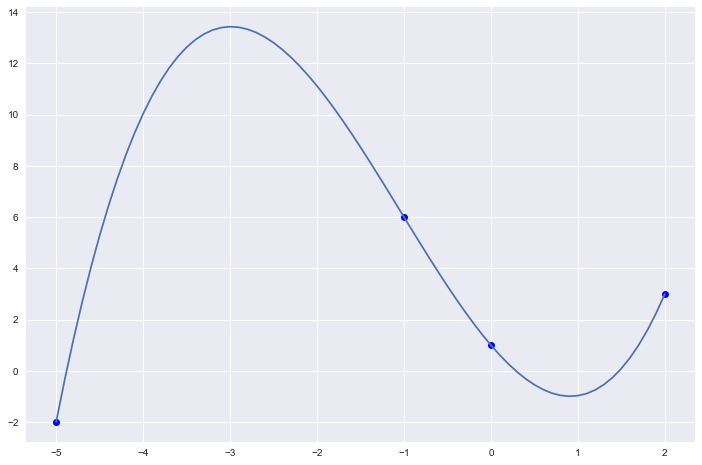

In [3]:
x = np.array([-5, -1, 0, 2])
y = np.array([-2, 6, 1, 3])
# get the divided difference coef
a_s = divided_diff(x, y)[0, :]

# evaluate on new data points
x_new = np.arange(-5, 2.1, .1)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (12, 8))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)